In [1]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.datasets import load_boston  # Remove this line
import pandas as pd
import numpy as np

In [2]:
# Load the Boston Housing dataset from the original source (as suggested in the error message)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
# Create a DataFrame
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data['MEDV'] = target  # Add response variable (Median Value of Homes)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Define predictors (X) and response variable (y)
# Full model, just drop the dependent varable
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [6]:
# Split the data into training and testing sets
# 0.2 means 20% data go to test set
# random_state=42 the split is reproducible , similar to seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Inspect data
X_test.shape

(102, 13)

In [8]:
X_train.shape

(404, 13)

The data was split into 80% for training and 20% for testing.

This ensures the model is evaluated on unseen data, simulating real-world generalization performance.

The MEDV column (housing prices) is the response variable, while other columns serve as predictors.

### BIAS / Variance Tradeoff demostration

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
train_errors = []
test_errors = []

In [11]:
# Iterate over polynomial degrees (model complexity)
degrees = [1, 2, 3, 4]

for d in degrees:
    # Create polynomial features using only 'RM'
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train[['RM']])
    X_test_poly = poly.transform(X_test[['RM']])
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Store MSE
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

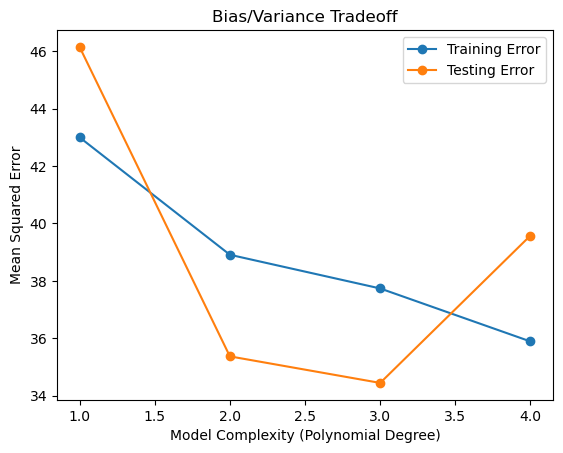

In [12]:
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Testing Error", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias/Variance Tradeoff")
plt.legend()
plt.show()

Interpretation:

1) Training Error decreases as model complexity increases because the model fits the training data better.
2) Testing Error initially decreases but eventually increases as the model begins to overfit the training data.
3) The graph clearly shows the bias/variance tradeoff:
   
Low complexity (Degree 1): High bias (underfitting).

High complexity (Degree 4): High variance (overfitting).

Optimal complexity (Degree 2 or 3): Best balance between bias and variance.

### Implement Ridge Regression - L2 Regularization

In [14]:
from sklearn.linear_model import Ridge

In [15]:
# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge.fit(X_train, y_train)

Ridge()

In [16]:
# Predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

Ridge Test MSE: 24.477191227708655
Ridge Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]


Interpretation:

Ridge regression has a Test MSE of approximately 24, indicating good performance on unseen data.

Coefficients are shrunk but remain non-zero, showing Ridge effectively reduces variance without removing predictors.

Ridge regularization helps balance model complexity while retaining all features, making the model stable.

### Implement Lasso Regression - L1 Regularization

In [17]:
from sklearn.linear_model import Lasso

In [18]:
# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [19]:
# Predict and calculate MSE
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

Lasso Test MSE: 25.155593753934173
Lasso Coefficients: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


Interpretation:

Lasso regression produces a higher Test MSE of approximately 25, indicating slightly worse performance compared to Ridge.

Some coefficients are exactly zero (e.g., the last coefficient), meaning Lasso performs feature selection by eliminating less significant predictors.

Lasso simplifies the model, which improves interpretability but can increase bias slightly.

### Comparisson Ridge and Lasso

In [20]:
print(f"Ridge Test MSE: {ridge_mse:.3f}")
print(f"Lasso Test MSE: {lasso_mse:.3f}")


print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

Ridge Test MSE: 24.477
Lasso Test MSE: 25.156
Ridge Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Lasso Coefficients: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


### **Conclusion**

Output Summary:
1) Ridge Test MSE: 24
2) Lasso Test MSE: 25
3) Ridge Coefficients: All coefficients are shrunk but remain non-zero, showing Ridge maintains all features and reduces variance.
4) Lasso Coefficients: Some coefficients are exactly zero (feature selection), which indicates Lasso is performing feature selection.

Interpretation:
1) Ridge Regression: Performs slighly better in terms of Test MSE by retaining all predictors and stabilizing coefficients.
2) Lasso Regression: Eliminate less important predictors, but this increases the Test MSE slightly. It sacrifices a bit of accuracy for model simplicity
   
Key Takeaways
1) Bias/Variance Tradeoff: Ridge and Lasso help address overfitting (high variance) while maintaining generalization.
2) Ridge vs. Lasso: Ridge (L2): Retains all predictors with smaller, regularized coefficients. Lasso (L1): Performs feature selection by shrinking some coefficients to zero.
   
Choosing a Model:
Use Ridge when all features are important.
Use Lasso when model simplicity and interpretability are priorities.